# Statistical Thinking in Python (Part 1)

After all of the hard work of acquiring data and getting them into a form we can work with, we ultimately want to make **clear, succinct conclusions** from them. This crucial last step of a data analysis pipeline hinges on the principles of **statistical inference**.

## 1. Graphical exploratory data analysis
Prior to diving in headlong into sophisticated statistical inference techniques, we should first explore your data by plotting them and computing simple summary statistics. This process, called **exploratory data analysis**, is a crucial first step in statistical analysis of data.

### 1.1 Introduction to exploratory data analysis
If we can appropriately display our data, we can already start to draw conclusions from it. Exploring the data is a crucial step in our analysis.  

> Exploratory Data Analysis (EDA) is the process of organizing, plotting and summarizing a data set. EDA was developed by one of the greatest statisticians of all time - John Tukey.

Graphical exploratory data analysis involves taking data from tabular form and representing it graphically.

### 1.2 Plotting a histogram

#### Plotting a histogram of iris data
Here we will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of iris, Iris setosa, Iris versicolor, and Iris virginica. The full data set is [available as part of scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Here, we will work with his measurements of petal length.

We will plot a histogram of the petal lengths of his 50 samples of Iris versicolor using matplotlib/seaborn's default settings.

First we will import the iris feature and target data into a dataframe and give appropriate column names.

In [10]:
# Import the iris data
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()

# ‘data’, the data to learn, 
# ‘target’, the classification labels, 
# ‘target_names’, the meaning of the labels, 
# ‘feature_names’, the meaning of the features, and 
# ‘DESCR’, the full description of the dataset.

#load the iris data into a DataFrame
iris = pd.DataFrame(data.data, columns = data.feature_names)
print(iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [11]:
# add a column for the classification labels
iris["target"] = data.target

# add a column for the label meanings i.e. species name
map_dict = {0:'setosa', 1:'versicolor', 2:'virginica'}
iris["species"] = iris["target"].map(map_dict)
print(iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [12]:
# create a series that includes petal lengths of the 50 samples of Iris versicolor
versicolor_petal_lengths = iris["petal length (cm)"][iris["species"] == "versicolor"]
print(versicolor_petal_lengths.head())
print(len(versicolor_petal_lengths))

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal length (cm), dtype: float64
50


#### Histogram with default number of bins

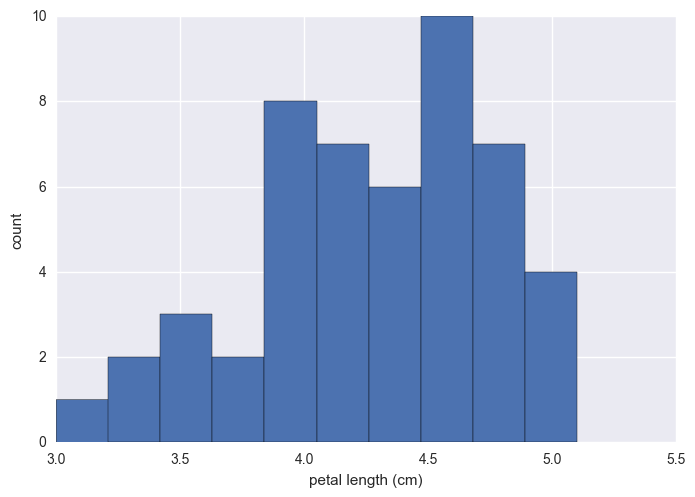

In [13]:
%matplotlib inline

# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_lengths)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

#### Adjusting the number of bins
The above histogram we just made has ten bins. This is the default of matplotlib. 

Bins can also be set manually using the `bins` keyword argument of plt.hist().
> `bins = 20`  

Another way is by specifying the bin edges as a list.
> `bin_edges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]`  
> `bins = bin_edges`

The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. 

We will plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins.

#### Histogram using square root rule for the number of bins

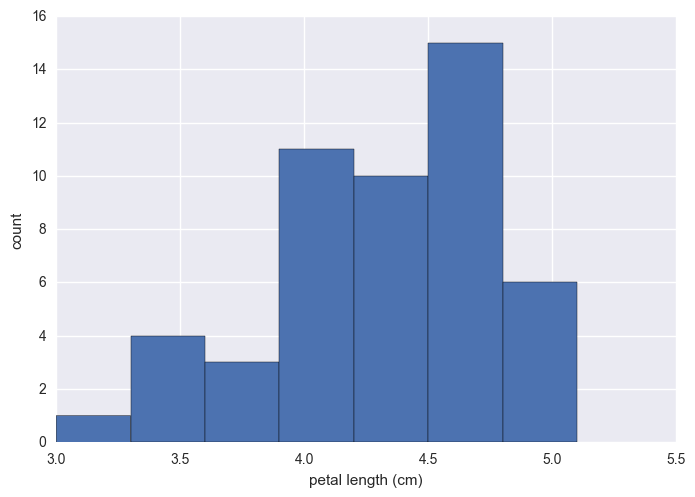

In [14]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_lengths)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(versicolor_petal_lengths, bins = n_bins)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

#### Histogram with manually set bin edges

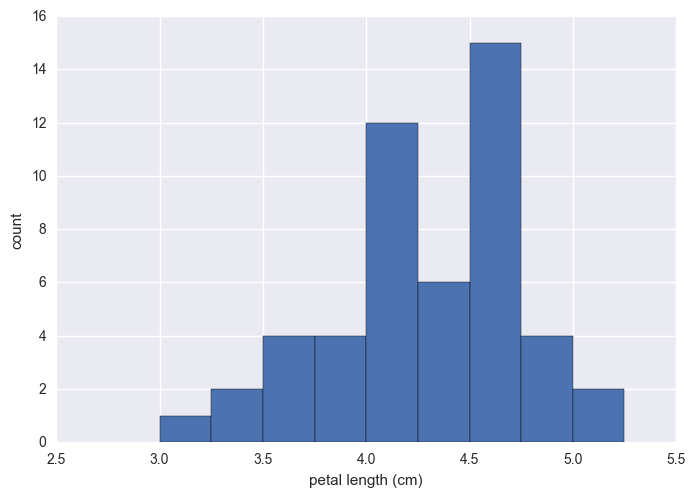

In [50]:
# Set the bin edges: bin_edges
bin_edges = [2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25]

# Plot the histogram
plt.hist(versicolor_petal_lengths, bins = bin_edges)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()



### 1.3 Plotting all of your data: Bee swarm plots

A major drawback of using histograms is that the same data may be interpreted differently depending on choice of bins. This is called **binning bias**.

An additional problem with histograms is that we are **not plotting all of the data**. We are sweeping the data into bins and losing their actual values.

To remedy these problems, we can make a **bee swarm plot** also known as swarm plot.

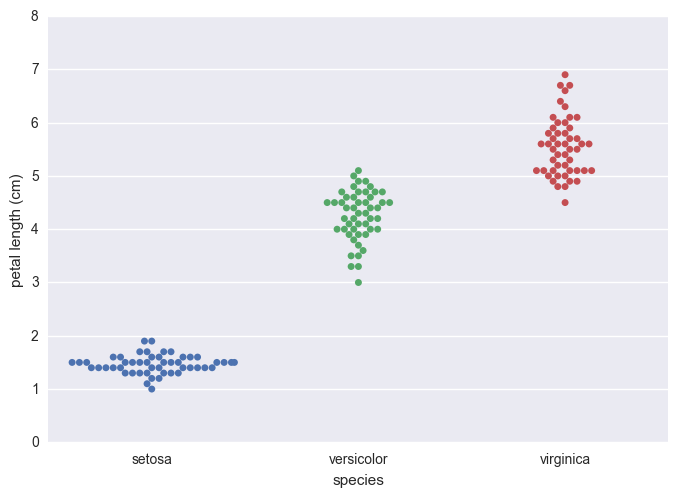

In [17]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y='petal length (cm)', data=iris)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()

### 1.4 Plotting all of your data: Empirical cumulative distribution functions
The x-value of an ECDF is the quantity you are measuring.
The y-value is the fraction of data points that have a value smaller than the corresponding x-value.
Example: 20% of counties had 36% or less vote for Obama.

The x-axis is sorted data
The y-axis is evenly spaced data points with a maximum of 1 which we can generate using the np.arange 


#### Computing the ECDF
We will write a function that takes as input a 1D array of data and then returns the x and y values of the ECDF. ECDFs are among the most important plots in statistical analysis.

In [20]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

#### Plotting the ECDF
We will use the ecdf() function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. We will then plot the ECDF. The ecdf() function returns two arrays so we will need to unpack them.

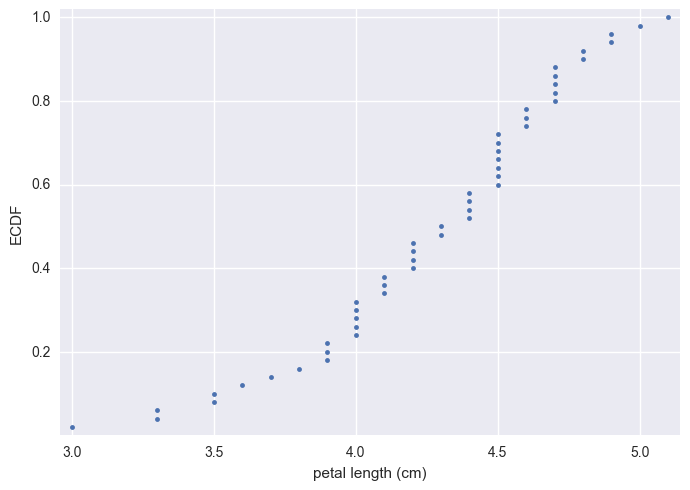

In [22]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_lengths)

# Generate plot
plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()

#### Comparison of ECDFs
ECDFs also allow you to compare two or more distributions. Here, we will plot ECDFs for the petal lengths of all three iris species.

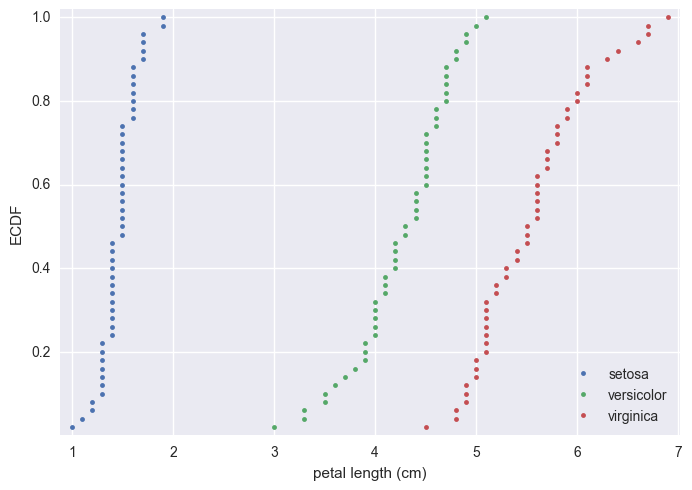

In [51]:
# create series for petal lengths of setosa and virginica species
setosa_petal_lengths = iris["petal length (cm)"][iris["species"] == "setosa"]
virginica_petal_lengths = iris["petal length (cm)"][iris["species"] == "virginica"]

# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_lengths)
x_vers, y_vers = ecdf(versicolor_petal_lengths) 
x_virg, y_virg = ecdf(virginica_petal_lengths)

# Plot all ECDFs on the same plot
plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()

## 2. Quantitative exploratory data analysis
Here we will compute useful summary statistics, which serve to concisely describe salient features of a data set with a few numbers.

### 2.1 Introduction to summary statistics: The sample mean and median
Often we would like to summarize data even more succintly in one or two numbers

The **mean** is the sum of all the data divided by the number of data points. It is heavily by outliers.
> np.mean()

The **median** is the middle value of a dataset. Sort the data and choose the data in the middle. It is immune to data that take on extreme values. 
> np.median()

#### Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().
Compute the mean petal length of Iris versicolor from Anderson's classic data set.

In [25]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_lengths)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


### 2.2 Percentiles, outliers, and box plots

**Computing Percentiles**  
The median is a special name for the 50th percentile i.e. 50% of the data are less than the median.
> `np.percentile()`

**Box plots**  
Box plots are used to display the salient features of a data set using percentiles.  
The center of the box is the median.  
The edges of the boxes are the 25th and 75th percentiles.  
The total height of the box contains the middle 50% of the data and is called the **interquartile range or IQR**.  
The whiskers extend to 1.5 times the IQR or to the extent of the data whichever is less extreme.  
Finally, all points outside of the whiskers are plotted as individual points, which we often demarcate as **outliers**.  
When the number of data are very large and bee swarm plots are too cluttered, box plots are a great alternative.  

#### Computing percentiles
Here we will compute the percentiles of petal length of Iris versicolor.

In [26]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_lengths, percentiles)

# Print the result
print(ptiles_vers)

[ 3.3     4.      4.35    4.6     4.9775]


#### Comparing percentiles to ECDF
To see how the percentiles relate to the ECDF, we will plot the percentiles of Iris versicolor petal lengths on the ECDF plot generated above.

To ensure the Y-axis of the ECDF plot remains between 0 and 1, we will need to rescale the percentiles array accordingly by dividing it by 100.

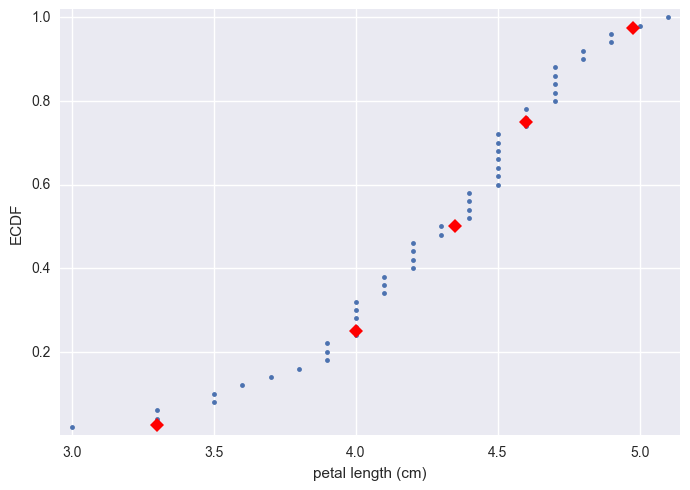

In [31]:
# Plot the ECDF
plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot
plt.show()

#### Box-and-whisker plot
Make a box plot of the iris petal lengths.

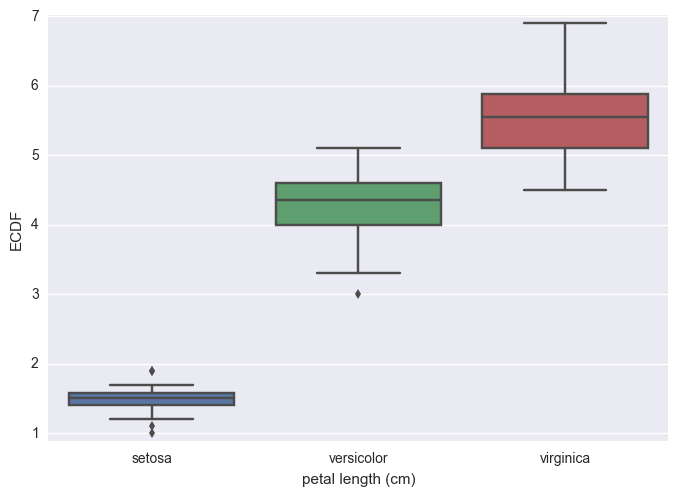

In [33]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='species', y='petal length (cm)', data=iris)
plt.margins(0.02)

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Show the plot
plt.show()

### 2.3 Variance and standard deviation
**Variance** is the average of the squared distance from the mean. It is a measure of the spread of the data.
> `np.var()`

**Standard deviation** is the square root of the variance. It is in the same unit as the data.
> `np.std()`  
> `np.sqrt(np.var())`

#### Computing the variance
We will explicitly compute the variance of the petal length of Iris versicolor using equations. We will then use np.var() to compute it.

In [35]:
# Array of differences to mean: differences
differences = versicolor_petal_lengths - np.mean(versicolor_petal_lengths)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_lengths)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000012 0.21640000000000012


#### The standard deviation and the variance
The standard deviation is the square root of the variance. We will see this by computing the standard deviation using np.std() and comparing it to what we get by computing the variance with np.var() and then computing the square root.

In [36]:
# Compute the variance: variance
variance = np.var(versicolor_petal_lengths)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_lengths))

0.465188133985
0.4651881339845204


### 2.4 Covariance and Pearson correlation coefficient
**Covariance**  
It is a measure of how two quantities vary together.  
If x is high while y is high then the covariance is positive i.e. they are positively coorelated.  
Conversely if x is high while y is low then the covariance is negative i.e. they are nagatively coorelated.  
> `np.cov()`  
> returns a 2D array where entries [0,1] and [1,0] are the covariances  
> entry [0,0] is the variance of the data in x  
> entry [1,1] is the variance of the data in y  
> this 2D output array is called the covariance matrix, since it organizes the self- and covariance  

**Pearson correlation coefficient**  
If we want a more generally applicable measure of how two variables depend on each other, we want it to be dimensionless i.e. to not have any units. So we can divide the covariance by the standard deviations of the x and y variables. This is the Pearson correlation coefficient also called the Pearson r and is often easier to interpret than the covariance.
It is the comparison of the "variability in the data due to codependence" to the "variability inherent in each variable independently" i.e. their standard deviations.   
It ranges from -1 for anti-correlation to 1 for complete correlation.  
A value of 0 means that there is no correlation at all between the data.  
The pearson correlation coefficient is a good metric for corelation between two variables.
> `np.corrcoef()`  
> it takes two arrays as arguments and returns a 2D array  
> entries [0,0] and [1,1] are necessarily equal to 1  
> the value we are after is entry [0,1]  


#### Scatter plots
In bee swarm plots, box plots, and ECDF plots we compared the petal lengths of different species of iris.
Now we will compare two properties of a single species. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

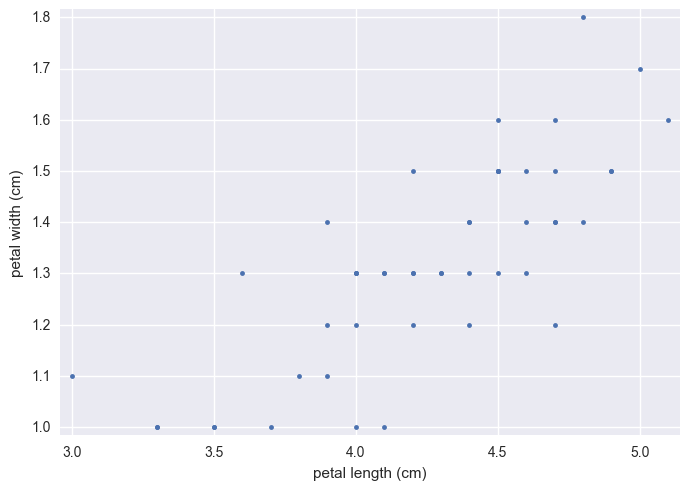

In [37]:
# First, create a series for petal widths for versicolor species
versicolor_petal_widths = iris["petal width (cm)"][iris["species"] == "versicolor"]

# Make a scatter plot
plt.plot(versicolor_petal_lengths, versicolor_petal_widths, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')


# Show the result
plt.show()

#### Computing the covariance

In [38]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_lengths, versicolor_petal_widths)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[1,0]

# Print the length/width covariance
print(petal_cov)

[[ 0.22081633  0.07310204]
 [ 0.07310204  0.03910612]]
0.0731020408163


#### Computing the Pearson correlation coefficient
We will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. We will use this function to compute it for the petal lengths and widths of I. versicolor.

In [39]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_lengths, versicolor_petal_widths)

# Print the result
print(r)

0.786668088523


## 3. Thinking probabilistically-- Discrete variables
Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. Here we will learn how to think probabilistically about discrete quantities, those that can only take certain values, like integers.

### 3.1 Probabilistic logic and statistical inference
Given a set of data we attempt to describe probabilistically what we might expect were those data acquired again and again. This is the heart of statistical inference. It is the process by which we go from measured data to probabilistic conclusions about what we might expect if we collected the same data again. The data speaks in a language of probability.

** What is the goal of statistical inference? **
* To draw probabilistic conclusions about what we might expect if we collected the same data again.
* To draw actionable conclusions from data.
* To draw more general conclusions from relatively few data or observations.

### 3.2 Random number generators and hacker statistics

**Hacker statistics**  
* Uses simulated repeated measurements to compute probabilities (instead of literally repeating the data acquisition over and over again).
  
  
**np.random module**
* Suite of functions based on random number generation
> `np.random.random()`  
> specify the number of random numbers required using the `size` keyword argument  
> draws a number between 0 and 1 such that each number has an equal chance of getting generated    
  
  
**Bernoulli trial**
* An experiment that has two options, "success" (True) and "failure" (False)
  
  
**Random number seed**
* Integer fed into random number generating algorithm  
* Manually feed random number generator if you need reproducibility  

The pseudo random number generator works by starting with an integer called a seed and then generates random numbers in succession. The same seed gives the same sequence of random numbers.
> `np.random.seed()`
  
  
**Hacker stats probabilities**  
With hacker statistics, we can pretty much do the same procedure every time.
* Determine how to simulate data
* Simulate many many times
* Probability is approximately fraction of trials with the outcome of interest

#### Generating random numbers using the np.random module
We will generate lots of random numbers between zero and one, and then plot a histogram of the results. If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

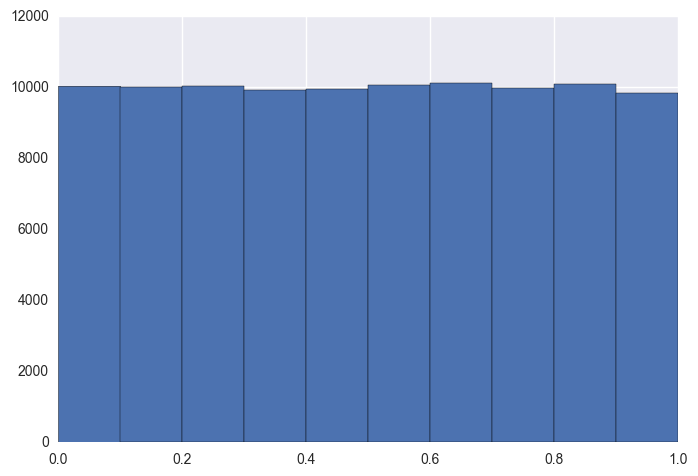

In [40]:
# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
plt.hist(random_numbers)

# Show the plot
plt.show()

#### The np.random module and Bernoulli trials
We can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability `p` of landing heads (success) and probability `1−p` of landing tails (failure).  

We will write a function to perform `n` Bernoulli trials, `perform_bernoulli_trials(n, p)`, which returns the **number of successes out of `n` Bernoulli trials, each of which has probability `p` of success**. To perform each Bernoulli trial, we will use the `np.random.random()` function, which returns a random number between zero and one.

In [42]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

#### How many defaults might we expect?
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. We  would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. 

To investigate this, we will do a simulation. We will perform 100 Bernoulli trials using the perform_bernoulli_trials() function we wrote above and record how many defaults we get. Here, a success is a default (the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?). We will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, we will plot a histogram describing the probability of the number of defaults.

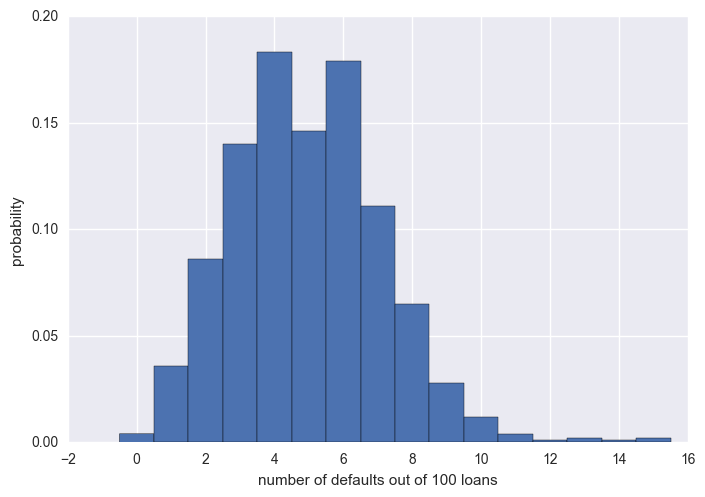

In [61]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

# Plot the histogram with default number of bins; label your axes
# set normed=True keyword argument so that the height of the bars of the histogram indicate the probability.
# set bin edges manually to center them on the integers since these are discrete values.
bin_edges = np.arange(0, max(n_defaults) + 1.5) - 0.5
plt.hist(n_defaults, normed=True, bins=bin_edges) 
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('probability')

# Show the plot
plt.show()

#### Will the bank fail?
Plot the number of defaults `n_defaults` as a CDF.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

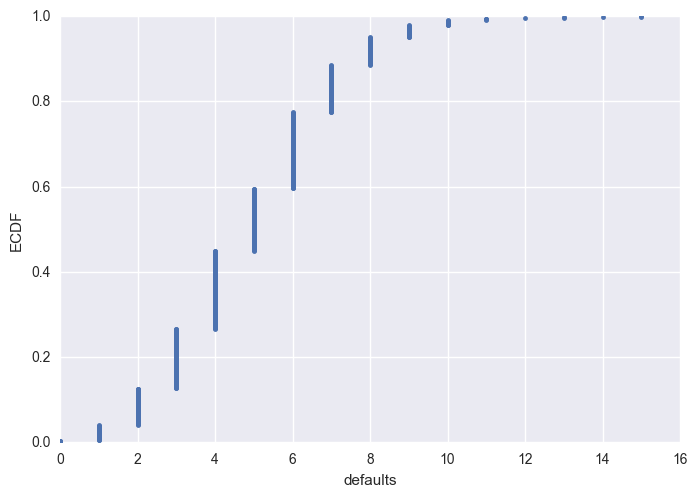

Probability of losing money = 0.022


In [48]:
# Compute ECDF: x, y
x_def, y_def = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.xlabel('defaults')
plt.ylabel('ECDF')
plt.plot(x_def, y_def, marker='.', linestyle='none')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

### 3.3 Probability distributions and stories: The Binomial distribution

**Probability Mass Function (PMF)**  
We simulated a story about a person flipping a coin to get the probability of each possible outcome of the story. That set of probabilities is called a Probability Mass Function or PMF.
* The set of probabilities of discrete outcomes

**Discrete Uniform PMF**  
Consider a simpler story - a person rolling a die once. The outcomes are discrete because only certain values can be attained. Each result has the same or uniform probability i.e. 1/6th. For this reason the PMF associated with this story is called the Discrete Uniform PMF.  

**Probability distribution**
The PMF is a property of a discrete probability distribution.  
* A distribution is just a mathematical distribution of outcomes.  
We can match a story to a mathematical distribution of probabilities.

**Discrete Uniform distribution: the story**  
* the outcome of rolling a single fair die is Discretely Uniformly distributed  

**Binomial distribution: the story**  
* the number r of successes in n Bernoulli's trials with probability p of success, is Binomially distributed
* the number r of heads in 4 coin flips with probability 0.5 of heads matches this story i.e. it is Binomially distributed

**Sampling from the Binomial distribution**  
> `np.random.binomial(4, 0.5, size=10)`  
> argument 1 = the number of Bernoulli trials (e.g. 4 coin flips)  
> argument 2 = probability of success (e.g. 0.5)  
> `size` keyword argument = how many random numbers to sample out of the Binomial distribution (size=10)  

**The Binomial PMF**  
To be able to plot the Binomial PMF, we will draw samples.
> `samples = np.random.binomial(60, 0.1, size=10000)`  
If we do this over and over and tally the results, we can plot the PMF.
The most likely number of successes is 6 out of 60, but we may expect to get as many as 11 or as few as 1.
We will use a histogram to plot a PMF.  

**The Binomial CDF**
The CDF is just as informative as the PMF and easier to plot.


#### Sampling out of the Binomial distribution
We will compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, we will perform the sampling using `np.random.binomial()`. This is identical to the calculation we did using our custom-written `perform_bernoulli_trials()` function, but far more computationally efficient using the built-in function. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, we will plot the CDF. This CDF that we will plot is that of the Binomial distribution.

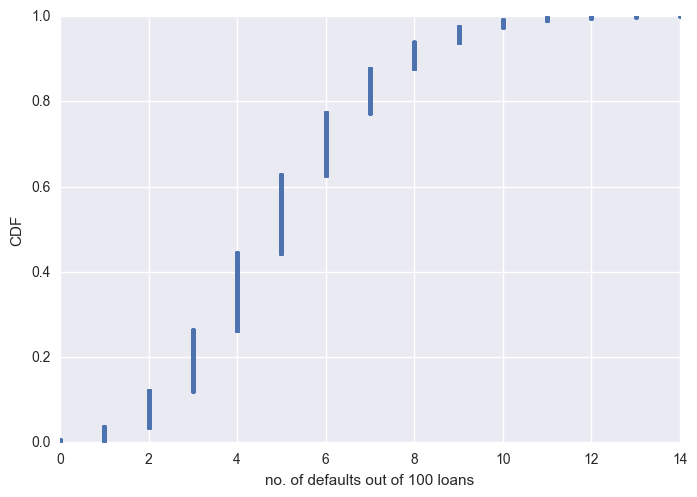

In [57]:
# Seed random number generator
np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('no. of defaults out of 100 loans')
plt.ylabel('CDF')

# Show the plot
plt.show()

#### Plotting the Binomial PMF
Plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram. We will be setting up the edges of the bins to pass to plt.hist() via the `bins` keyword argument so that the bins are centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

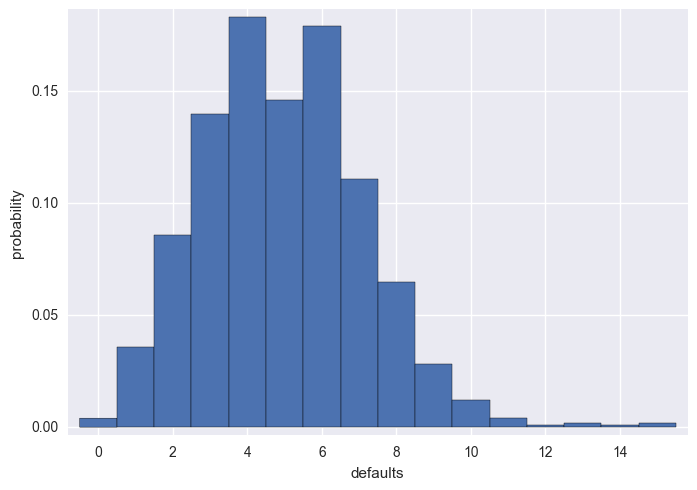

In [60]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, normed=True, bins=bins)

# Set margins
plt.margins(0.02)

# Label axes
plt.xlabel('defaults')
plt.ylabel('probability')

# Show the plot
plt.show()


### 3.4 Poisson processes and the Poisson distribution

**Poisson process**
* The timing of the next event is completely independent of when the previous event happened  

**Examples of Poisson processes**
* Natural births in a given hospital (the timing of one birth is completely independent of the timing of the previous one)
* Hits on a website during a given hour (the timing of nest hit is independent of the timing of the last)
* Meteor strikes  
* Molecular collisions in a gas  
* Aviation incidents  

**Poisson distribution**  
The number of arrivals in a Poisson process in a given amount of time is Poisson distributed.
The Poisson distribution has one parameter - the average number of arrivals in a given length of time.
* The number r of arrivals of a Poisson process in a given time interval with average rate of lambda arrivals per interval is Poisson distributed.  
* Example: The number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distributed.  

**Poisson PMF**  
For a given hour we are most likely to get 6 hits which is the average. But we may get more than 10 or possibly none.
This looks similar to the Binomial PMF.
* Limit of the Binomial distribution for low probability of success and large number of Bernoulli trials.
* That is, for rare events.  

**The Poisson CDF**  
> `samples = np.random.poisson(6, size=10000)`  
> argument 1 = average arrivals per interval i.e. average hits per hour  
> `size` keyword argument = to allow for multiple samples  

The result of plotting a Poisson CDF looks predictably like the Binomial CDF.

#### Relationship between Binomial and Poisson distributions  
The Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to `np` approximates a Binomial distribution for `n` Bernoulli trials with probability `p` of success (with `n` large and `p` small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

Let's explore these two distributions computationally. We will compute the mean and standard deviation of samples from a Poisson distribution with an arrival rate of 10. Then, we will compute the mean and standard deviation of samples from a Binomial distribution with parameters `n` and `p` such that `np=10`.

In [62]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial), np.std(samples_binomial))

Poisson:      9.9881 3.15784077971
n = 20 Binom: 10.0222 2.2492014494
n = 100 Binom: 10.0776 3.01227127596
n = 1000 Binom: 10.0481 3.14801308606


The means are all about the same.   
The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

#### How many no-hitters in a season?
In baseball, a no-hitter is a game in which a pitcher does not allow the other team to get a hit. This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. 

Q: Which probability distribution would be appropriate to describe the number of no-hitters we would expect in a given season?
A: Both Binomial and Poisson, though Poisson is easier to model and compute. When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

#### Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [63]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0071


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

## 4. Thinking probabilistically-- Continuous variables

### 4.1 Probability density functions

**Continuous variables**  
* Quantities that can take any value, not just discrete values  
Example: the speed of a train can be 45.76 km per hour

Continuous variables also have probability distributions. They follow the Normal distribution.  

**Probability Density Function (PDF)**  
* Continuous analog to the PMF  
* Mathematical description of the relative likelihood or chance of observing a value of a continuous variable  
A PDF can have any shape. It just has to be singularly-valued, nonnegative, and the total area under the PDF must be equal to one.

**Normal PDF**  
The probability of observing a single value of the variable (e.g. speed of a train) does not make sense because there is an infinity of numbers.  
Instead areas under the PDF give the probabilities.  

So the probability of measuring that the variable is greater than say x is an area under the normal curve.
To do this calculation we are really looking at the CDF of the normal distribution.

**Normal CDF**  
The CDF gives the probability that the measured variable will be less than the value on the x-axis.  

### 4.2 Introduction to the Normal distribution

**Normal distribution**  
* Describes a continuous variable whose PDF is symmetrical and has a single peak.  
* parameterized by two parameters
  * the mean determines where the center of the peak is  
  * the standard deviation is a measure of how wide the peak is or how spread out the data is  

**Comparing data to a Normal PDF**  
If we add a histogram of the Michelson measurements, we see that the measured speed of light in air looks to be normally distributed. Comparing the histogram to the the PDF suffers from binning bias, so it is better to compare the ECDF of the data to the theoretical CDF of the normal distribution.

#### The Normal PDF
We will explore the Normal PDF and also plot a PDF of a known distribution using hacker statistics. Specifically, we will plot a Normal PDF for various values of the variance.

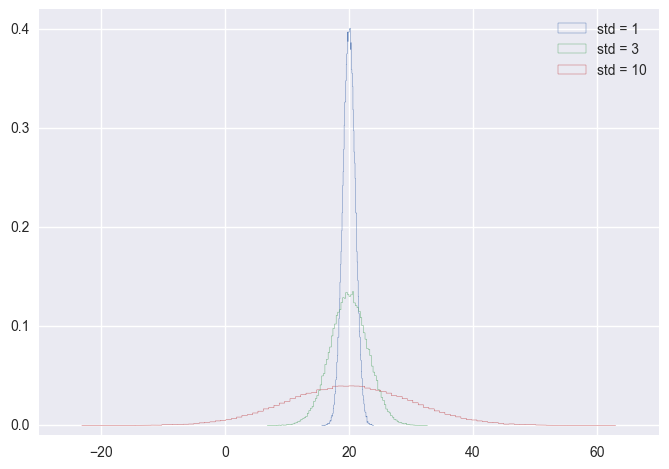

In [64]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000) 
samples_std3 = np.random.normal(20, 3, size=100000)  
samples_std10 = np.random.normal(20, 10, size=100000) 

# Make histograms
# histtype='step' keyword argument makes the plot look much like the smooth theoretical PDF
plt.hist(samples_std1, normed=True, histtype='step', bins=100)
plt.hist(samples_std3, normed=True, histtype='step', bins=100)
plt.hist(samples_std10, normed=True, histtype='step', bins=100)

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

The different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

#### The Normal CDF
Let's generate and plot the CDFs.

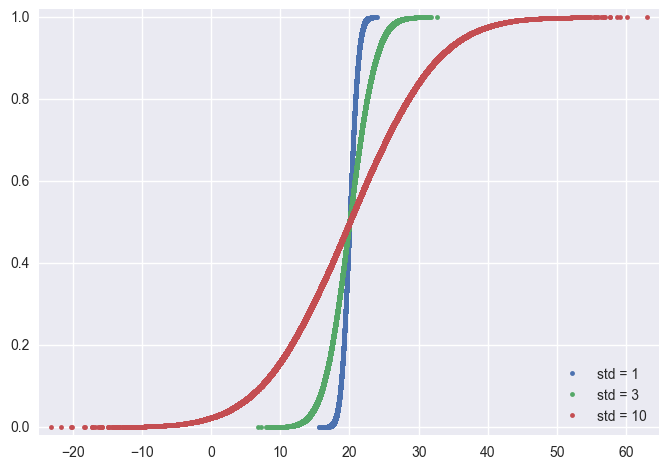

In [65]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker='.', linestyle='none')
plt.plot(x_std3, y_std3, marker='.', linestyle='none')
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

### 4.3 The Normal distribution: Properties and warnings
**The Gaussian distribution**  
The Normal distribution is also called the Gaussian distribution.  
It is very important and very widely used.  
In practice it is used to describe most symmetric peaked data that you will encounter.  
It is a very powerful distribution that seems to be ubiquitous in nature.  

There are important caveats about the distribution and we need to be careful when using it.  
* Oftentimes things that you may think are normally distributed are not.
* Light tails of the Normal distribution
  * the probability of being 4 standard deviations away from the mean is very small. This means outliers are extremely unlikely. But real datasets often have extreme values. When this happens, normal distribution may not the best description of your data.


#### Are the Belmont Stakes results Normally distributed?
Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the `np.random.normal() function` and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed? 

This data concerning the Belmont Stakes is from the [Belmont Wikipedia page](https://en.wikipedia.org/wiki/Belmont_Stakes).

In [70]:
# belmont data
belmont_no_outliers = [ 148.51,  146.65,  148.52,  150.7 ,  150.42,  150.88,  151.57,
        147.54,  149.65,  148.74,  147.86,  148.75,  147.5 ,  148.26,
        149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
        152.02,  146.82,  149.97,  146.13,  148.1 ,  147.2 ,  146.  ,
        146.4 ,  148.2 ,  149.8 ,  147.  ,  147.2 ,  147.8 ,  148.2 ,
        149.  ,  149.8 ,  148.6 ,  146.8 ,  149.6 ,  149.  ,  148.2 ,
        149.2 ,  148.  ,  150.4 ,  148.8 ,  147.2 ,  148.8 ,  149.6 ,
        148.4 ,  148.4 ,  150.2 ,  148.8 ,  149.2 ,  149.2 ,  148.4 ,
        150.2 ,  146.6 ,  149.8 ,  149.  ,  150.8 ,  148.6 ,  150.2 ,
        149.  ,  148.6 ,  150.2 ,  148.2 ,  149.4 ,  150.8 ,  150.2 ,
        152.2 ,  148.2 ,  149.2 ,  151.  ,  149.6 ,  149.6 ,  149.4 ,
        148.6 ,  150.  ,  150.6 ,  149.2 ,  152.6 ,  152.8 ,  149.6 ,
        151.6 ,  152.8 ,  153.2 ,  152.4 ,  152.2 ]

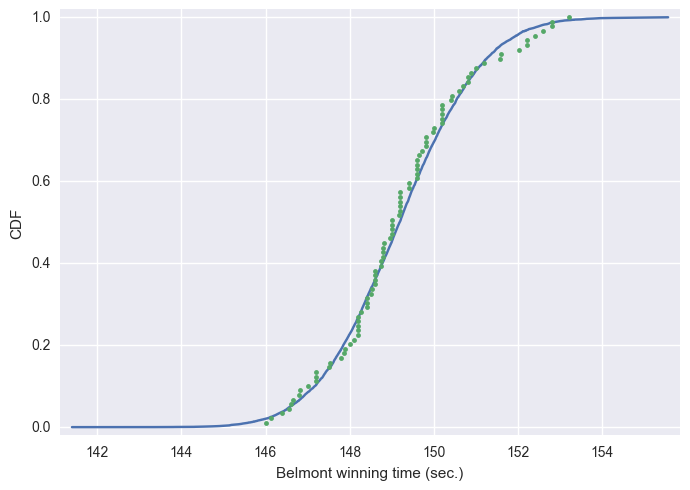

In [71]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Belmont winning time (sec.)')
plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.

#### What are the chances of a horse matching or beating Secretariat's record?
Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [72]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples < 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000619


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

### 4.4 The Exponential distribution
**The Exponential distribution**  
* The waiting time between arrivals of a Poisson process is Exponentially distributed.  
It has a single parameter - the mean waiting time.  
It is not peaked.  

**Possible Poisson process**  
* Nuclear incidents:  
  * Timing of one incident is independent of all others  

#### If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, we can always simulate it.

In Major League Baseball, hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, we will write a function to sample out of the distribution described by this story.

In [75]:
def successive_poisson(tau1, tau2, size=1):
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2

#### Distribution of no-hitters and cycles
Now, we will use our sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

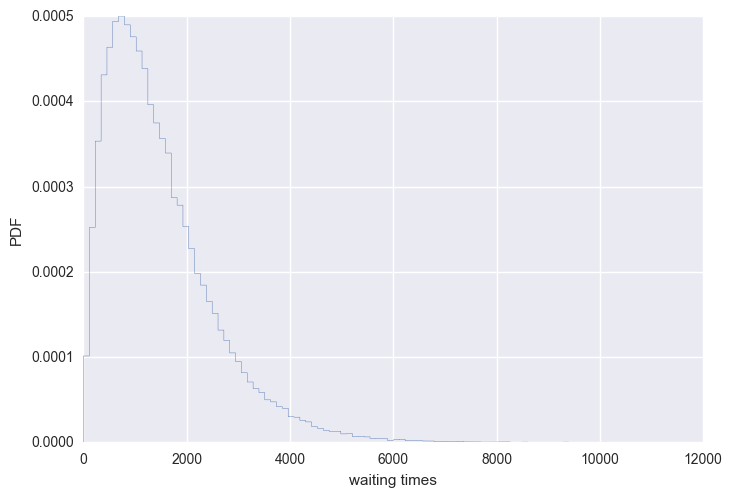

In [76]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
plt.hist(waiting_times, bins=100, normed=True, histtype='step')

# Label axes
plt.xlabel('waiting times')
plt.ylabel('PDF')

# Show the plot
plt.show()

The PDF is peaked, unlike the waiting time for a single Poisson process.

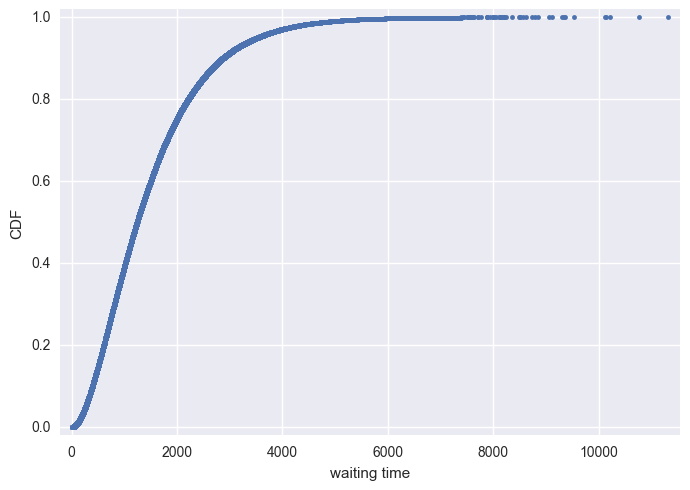

In [77]:
# Get the CDF of the samples and of the data
x_wait, y_wait = ecdf(waiting_times)

# Plot the CDFs and show the plot
plt.plot(x_wait, y_wait, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('waiting time')
plt.ylabel('CDF')
plt.show()